In [1]:
import numpy as np
import pandas as pd

import sys
import os

from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen

import matplotlib.pyplot as plt

# Pillow

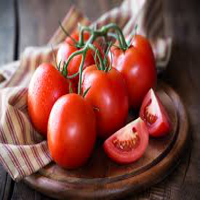

In [2]:
im_tom = Image.open("./test_images/tomatoes.jpeg")
im_tom = im_tom.resize((200,200))
im_tom

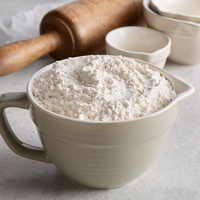

In [3]:
im_fl = Image.open("./test_images/flour.jpg")
im_fl = im_fl.resize((200,200))
im_fl

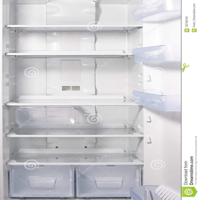

In [4]:
bg1 = Image.open("./test_images/background_fridge.jpg")
bg1 = bg1.resize((200,200))
bg1

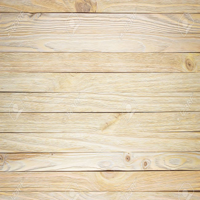

In [5]:
bg2 = Image.open("./test_images/background_table.jpg")
#bg2 = tf.image.resize(bg2,[200,200])
bg2 = bg2.resize((200,200))
bg2

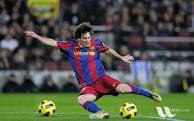

In [6]:
testim = Image.open("./test_images/messi5.jpeg")
#testim = testim.resize((200,200))
testim

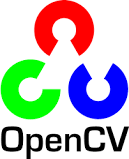

In [7]:
testim2 = Image.open("./test_images/opencv_logo.png")
#testim2 = testim.resize((200,200))
testim2

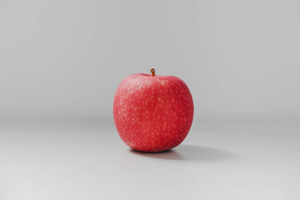

In [8]:
im_apple = Image.open("./test_images/apple.jpeg")
im_apple = im_apple.resize((300,200))
im_apple

In [9]:
list_images = []

for root, dirs, files in os.walk('./test_images'):
    for file in files:
        file_path = f'{os.getcwd()}/test_images/{file}' # there is a cleaner way to do it
        list_images.append(file_path)
list_images

['/Users/iskriyanavasileva/git/deep-food/test_images/tomatoes.jpeg',
 '/Users/iskriyanavasileva/git/deep-food/test_images/opencv_logo.png',
 '/Users/iskriyanavasileva/git/deep-food/test_images/apple.jpeg',
 '/Users/iskriyanavasileva/git/deep-food/test_images/flour.jpg',
 '/Users/iskriyanavasileva/git/deep-food/test_images/background_fridge.jpg',
 '/Users/iskriyanavasileva/git/deep-food/test_images/background_table.jpg',
 '/Users/iskriyanavasileva/git/deep-food/test_images/messi51.jpeg',
 '/Users/iskriyanavasileva/git/deep-food/test_images/messi5.jpeg']

In [10]:
images = [Image.open(x) for x in list_images]

widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

In [11]:
new_im = Image.new('RGB', (total_width,max_height))

In [12]:
x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

new_im.save('test.jpg')

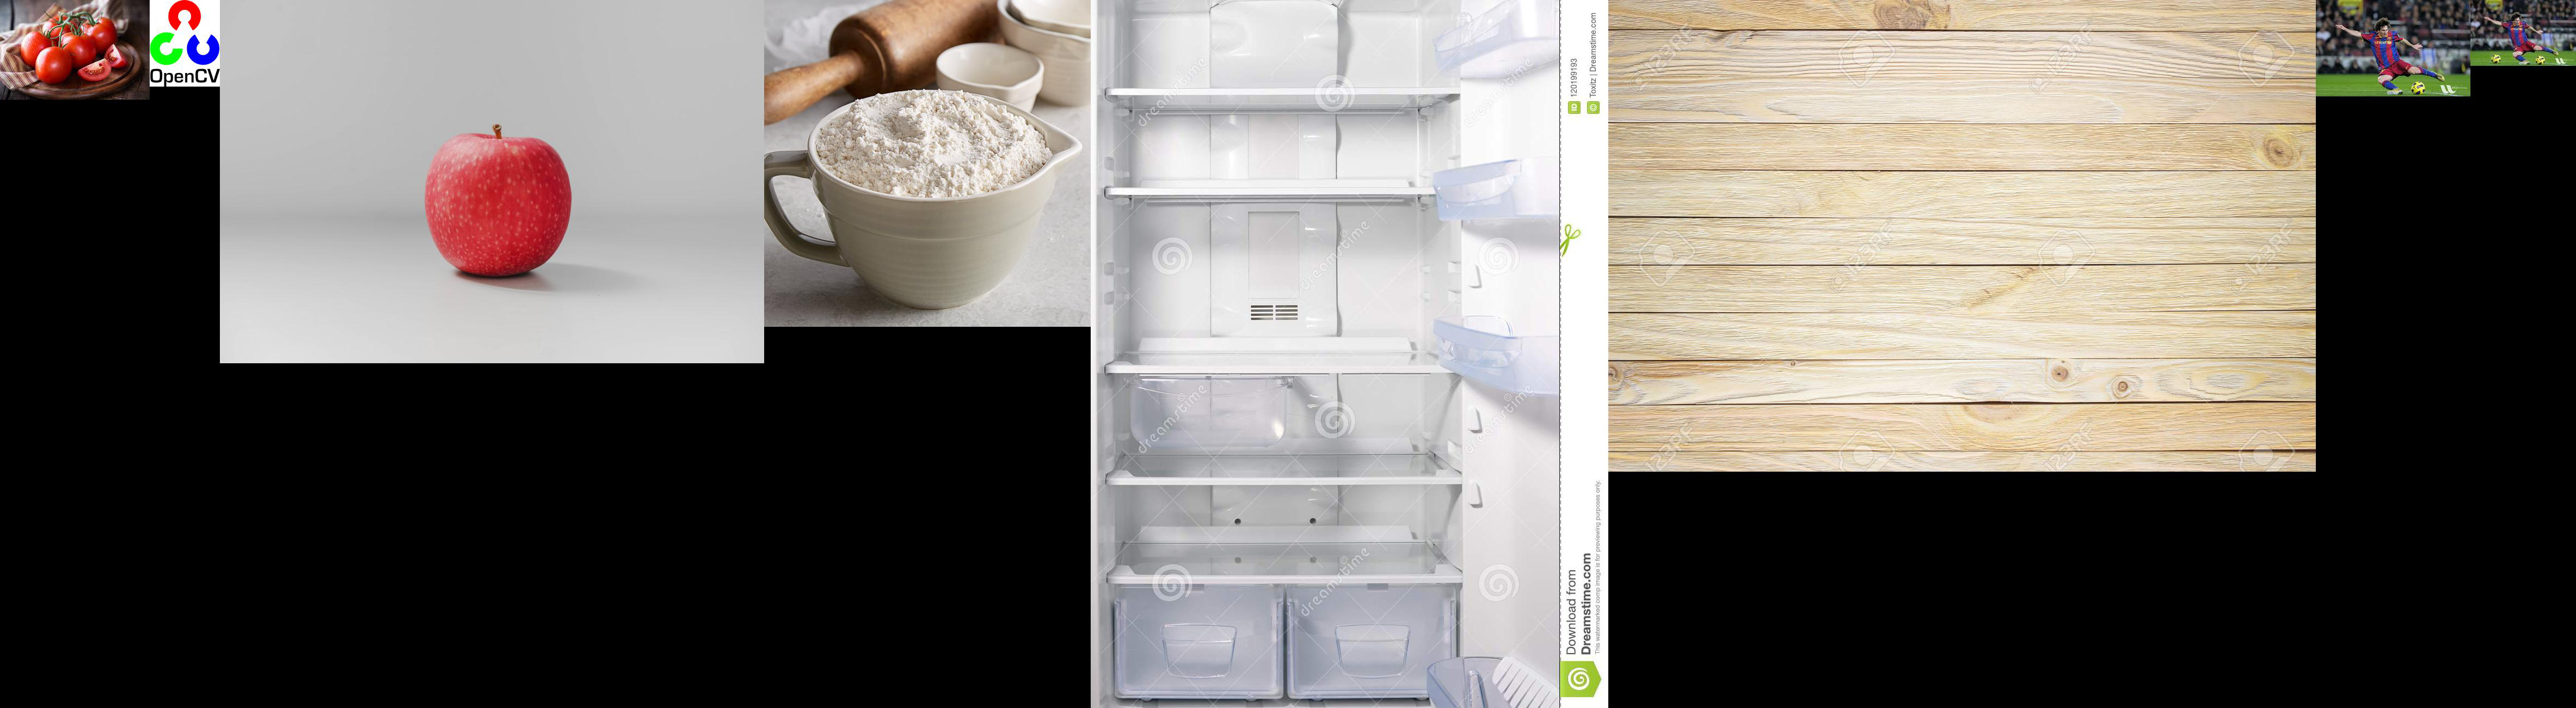

In [13]:
im_test = Image.open("./test.jpg")
im_test

# OpenCV

## Superimposing

In [14]:
# https://github.com/PacktPublishing/Hands-On-Image-Processing-with-Python/blob/master/Chapter01/Chapter1.ipynb
multiply(bg2, im_fl).show()

## Alpha-Blending

In [15]:
# https://github.com/PacktPublishing/Hands-On-Image-Processing-with-Python/blob/master/Chapter01/Chapter1.ipynb
im_a_blend = Image.blend(bg2, im_fl, alpha=0.5).show()

## Image Overlays Using Bitwise Operations in OpenCV

Test Code from tutorial

In [16]:
# https://www.learnopencv.com/alpha-blending-using-opencv-cpp-python/
import cv2

# Read the images
foreground = cv2.imread("./test_images/tomatoes.jpeg")
background = cv2.imread("./test_images/background_table.jpg")
alpha = cv2.imread("./test_images/tomatoes.jpeg")

# Convert uint8 to float
foreground = foreground.astype(float)
background = background.astype(float)

# Normalize the alpha mask to keep intensity between 0 and 1
alpha = alpha.astype(float)/255

# Multiply the foreground with the alpha matte
foreground = cv2.multiply(alpha, foreground)

# Multiply the background with ( 1 - alpha )
background = cv2.multiply(1.0 - alpha, background)

# Add the masked foreground and background.
outImage = cv2.add(foreground, background)

# Display image
cv2.imshow("outImg", outImage/255)
cv2.waitKey(0)


error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/core/src/arithm.cpp:659: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [ ]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html
# Load two images
background = cv2.imread('./test_images/background_table.jpg')
image = cv2.imread('./test_images/tomatoes.jpeg')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = image.shape
roi = background[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(image, image, mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg, img2_fg)
background[0:rows, 0:cols ] = dst

cv2.imshow('res', background)
cv2.waitKey(0)
#cv2.destroyAllWindows()

In [ ]:
# https://docs.opencv.org/master/d0/d86/tutorial_py_image_arithmetics.html 
# https://theailearner.com/2019/03/26/image-overlays-using-bitwise-operations-opencv-python/ - with this parameters it works

import cv2

# Load two images
img1 = cv2.imread('./test_images/messi51.jpeg')
#img1 = img1.resize((200,200))
img2 = cv2.imread('./test_images/opencv_logo.png')
#img2 = img2.resize((200,200))

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 200, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2, img2, mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg, img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res',img1)
#cv2.imshow('img2gray',img2gray)
#cv2.imshow('img1_bg', img1_bg)
#cv2.imshow('img2_fg', img2_fg)
#cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

In [ ]:
cv2.imshow('res', img2gray)

In [ ]:
print(roi.shape)
print(mask.shape)
print(img1.shape)
print(img2.shape)

In [ ]:
img1.dtype

In [ ]:
img2.dtype

In [90]:
# test for our images + explanations

import cv2

# Load two images
# TODO:Ingredient should be made half the size of background
background = cv2.imread('./test_images/background_table.jpg')
#background = background.resize((200,200))
rows_b, cols_b, channels_b = background.shape

ingredient = cv2.imread('./test_images/apple.jpeg')
# keep the aspect ratio by resizing https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv
aspect_ratio = float(ingredient.shape[1])/float(ingredient.shape[0])
rows_i = int(rows_b/2)
cols_i = int(rows_i/aspect_ratio)
dim_res = (rows_i, cols_i)
ingredient = cv2.resize(ingredient, dim_res)


# Create a Region of Images (=ROI) in a randomised matter 
# roi = Region Of Images https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html
rows, cols, channels = ingredient.shape
# TODO position on picture needs to be randomised
#start_rows = np.random.randint(0, size=rows)
#start_cols = np.random.randint(0, size=cols)
#roi = background[start_rows:rows, start_cols:cols] 
roi = background[0:rows, 0:cols]



# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(ingredient, cv2.COLOR_BGR2GRAY)

#in the case of the apple: 
# everything higher than 180 (i.e. lighter), will become black
# the rest (i.e. the darker pixels filled by the object), will become white
# TODO: the threshold needs to be adjustable according to the image
blur = cv2.GaussianBlur(img2gray, (5,5), 0)
ret, mask = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY_INV)

mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
background_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)

# Take only region of logo from logo image.
ingredient_fg = cv2.bitwise_and(ingredient, ingredient, mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(background_bg, ingredient_fg)
#background[start_rows:rows, start_cols:cols] = dst
background[0:rows, 0:cols] = dst

cv2.imshow('res', background)
#cv2.imshow('img2gray',img2gray)
#cv2.imshow('mask', mask)
#cv2.imshow('mask_inv', mask_inv)
#cv2.imshow('ret', ret)
#cv2.imshow('background_bg', background_bg)
#cv2.imshow('ingredient_fg', ingredient_fg)
#cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [77]:
test345 = cv2.imread('./test_images/apple.jpeg')

In [78]:
test345 = cv2.resize(test345, (200,200))

In [79]:
test345

array([[[192, 192, 192],
        [193, 193, 193],
        [193, 193, 193],
        ...,
        [191, 191, 191],
        [191, 191, 191],
        [190, 190, 190]],

       [[192, 192, 192],
        [193, 193, 193],
        [193, 193, 193],
        ...,
        [191, 191, 191],
        [191, 191, 191],
        [190, 190, 190]],

       [[193, 193, 193],
        [193, 193, 193],
        [193, 193, 193],
        ...,
        [191, 191, 191],
        [191, 191, 191],
        [191, 191, 191]],

       ...,

       [[217, 217, 217],
        [217, 217, 217],
        [218, 218, 218],
        ...,
        [211, 211, 211],
        [211, 211, 211],
        [210, 210, 210]],

       [[217, 217, 217],
        [217, 217, 217],
        [218, 218, 218],
        ...,
        [211, 211, 211],
        [211, 211, 211],
        [210, 210, 210]],

       [[218, 218, 218],
        [218, 218, 218],
        [220, 220, 220],
        ...,
        [211, 211, 211],
        [211, 211, 211],
        [209, 209, 209]]

In [ ]:
img2gray

In [ ]:
img1.shape

In [ ]:
img2.shape

In [36]:
import cv2
  
originalImage = cv2.imread('./test_images/tomatoes.jpeg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
  
#blur = cv2.GaussianBlur(grayImage, (5,5), 0)
#(thresh, blackAndWhiteImage) = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
 
cv2.imshow('Black white image', blackAndWhiteImage)
cv2.imshow('Original image',originalImage)
cv2.imshow('Gray image', grayImage)
  
cv2.waitKey(0)
cv2.destroyAllWindows()
#cv2.waitKey(1)

In [40]:
# Ideas: 

# combination of multiolication (superimposing) & adding (see first tutorial)
# continue with bitwise operation - threshold variable

In [49]:
Image.open("./test_images/background_fridge.jpg").size

(951, 1300)

In [50]:
Image.open("./test_images/apple.jpeg").size

(1000, 667)